In [47]:
import pandas as pd
import numpy as np



In [48]:
# Cargar el dataset
df = pd.read_csv("train.csv")
df


,id,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,268,1002,Dell,Inspiron 5567,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon R7 M445,Windows 10,2.36kg,749.00
1,347,867,Asus,X541NA (N4200/4GB/1TB/W10),Notebook,15.6,1366x768,Intel Pentium Quad Core N4200 1.1GHz,4GB,1TB HDD,Intel HD Graphics 505,Windows 10,2kg,449.00
2,353,966,Toshiba,Portege Z30-C-1CW,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 7,1.2kg,1460.00
3,578,767,Dell,Alienware 17,Gaming,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.42kg,2868.99
4,42,1241,Dell,Latitude E7270,Ultrabook,12.5,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 7,1.26kg,1713.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,89,973,Acer,Chromebook C738T-C2EJ,2 in 1 Convertible,11.6,IPS Panel Touchscreen 1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,32GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.25kg,389.00
908,716,1018,Toshiba,Portege Z30-C-16H,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.2kg,1195.00
909,517,1071,Acer,Aspire ES1-523,Notebook,15.6,1366x768,AMD A8-Series 7410 2.2GHz,8GB,1TB HDD,AMD Radeon R5,Windows 10,2.4kg,449.00
910,891,965,Dell,Latitude 7480,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 7600U 2.8GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.36kg,1775.00


In [49]:
# Información general
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                912 non-null    int64  
 1   laptop_ID         912 non-null    int64  
 2   Company           912 non-null    object 
 3   Product           912 non-null    object 
 4   TypeName          912 non-null    object 
 5   Inches            912 non-null    float64
 6   ScreenResolution  912 non-null    object 
 7   Cpu               912 non-null    object 
 8   Ram               912 non-null    object 
 9   Memory            912 non-null    object 
 10  Gpu               912 non-null    object 
 11  OpSys             912 non-null    object 
 12  Weight            912 non-null    object 
 13  Price_euros       912 non-null    float64
dtypes: float64(2), int64(2), object(10)
memory usage: 99.9+ KB
None


In [50]:
# Estadísticas descriptivas
print(df.describe())

                id    laptop_ID      Inches  Price_euros
count   912.000000   912.000000  912.000000   912.000000
mean    645.091009   666.192982   15.011404  1108.122873
std     380.313813   384.873846    1.411744   714.597741
min       0.000000     1.000000   10.100000   174.000000
25%     319.750000   330.500000   14.000000   589.000000
50%     636.500000   673.500000   15.600000   949.000000
75%     980.250000   998.500000   15.600000  1458.500000
max    1302.000000  1320.000000   18.400000  6099.000000


In [51]:
import matplotlib.pyplot as plt
import seaborn as sns


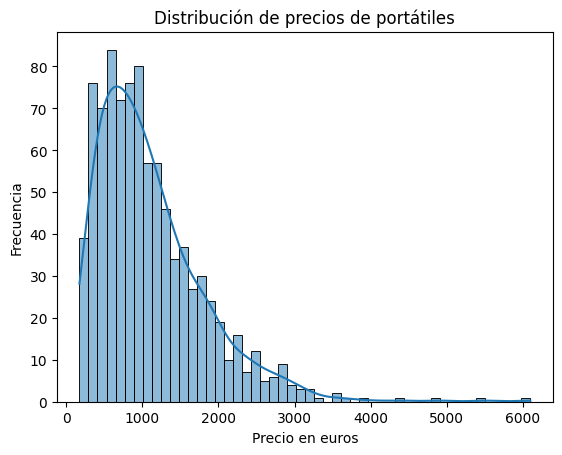

In [52]:
# Histograma de precios
sns.histplot(df["Price_euros"], bins=50, kde=True)
plt.xlabel("Precio en euros")
plt.ylabel("Frecuencia")
plt.title("Distribución de precios de portátiles")
plt.show()


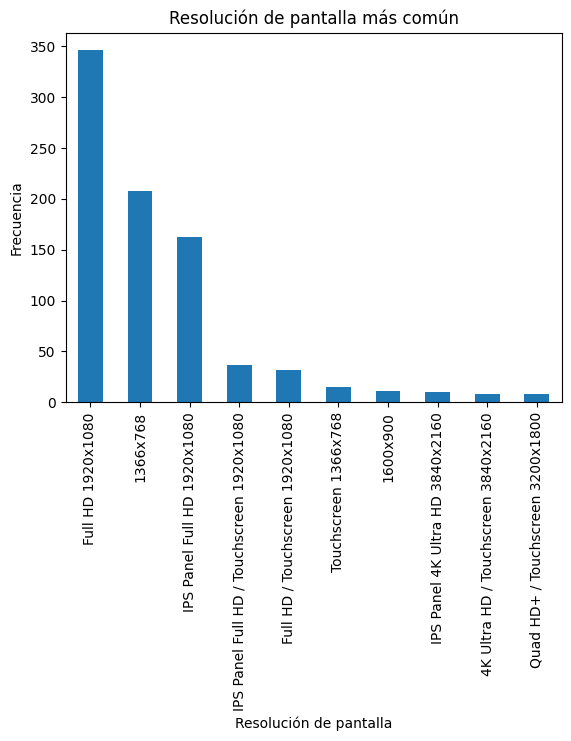

In [53]:
df["ScreenResolution"].value_counts().head(10).plot(kind='bar')
plt.xlabel("Resolución de pantalla")    
plt.ylabel("Frecuencia")
plt.title("Resolución de pantalla más común")
plt.show()
# Gráfico de barras de marcas más comunes

# EVALUACIÓN DEL DATASET:
De acuerdo a lo observado, gran parte de las variables son de tipo object, lo que nos motiva a evaluar el dataset y considerar transformar, de acuerdo a su naturaleza, las variables que sean susceptibles de ser transformadas en numéricas.

In [54]:
# Entre las variables que intentaremos trasnformar están:
# Weight, Ram, y Memory

# Transformación de Weight (Simplmente eliminamos la unidad kg y convertimos a float)
df["Weight_kg"] = df["Weight"].str.replace("kg", "").astype(float)

# Transformación de RAM 
df["Ram_GB"] = df["Ram"].str.replace("GB", "").astype(int)



In [55]:
# Transformación de Memory a un formato numérico más manejable
# Primero, vamos a ver cómo están representados los datos de Memory
df["Memory"].unique()

array(['1TB HDD', '256GB SSD', '256GB SSD +  1TB HDD',
       '512GB SSD +  2TB HDD', '128GB SSD +  1TB HDD', '128GB SSD',
       '1TB SSD', '64GB Flash Storage', '2TB HDD', '500GB HDD',
       '1.0TB Hybrid', '16GB Flash Storage', '256GB Flash Storage',
       '180GB SSD', '32GB Flash Storage', '512GB SSD',
       '512GB SSD +  1TB HDD', '256GB SSD +  500GB HDD',
       '256GB SSD +  2TB HDD', '1TB SSD +  1TB HDD', '64GB SSD',
       '128GB Flash Storage', '256GB SSD +  1.0TB Hybrid', '32GB SSD',
       '512GB Flash Storage', '240GB SSD', '256GB SSD +  256GB SSD',
       '16GB SSD', '8GB SSD', '64GB Flash Storage +  1TB HDD',
       '1.0TB HDD', '1TB HDD +  1TB HDD', '512GB SSD +  512GB SSD',
       '128GB SSD +  2TB HDD', '32GB HDD', '512GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [56]:
# Dado que puede haber múltiples unidades de almacenamiento (GB/TB), 
# vamos a crear una nueva variable que agrupe todo en GB.
import re

# Función para convertir Memory en GB
def convert_memory(memory):
    # Separar múltiples unidades de almacenamiento
    parts = memory.split(" + ")
    total_gb = 0
    
    for part in parts:
        # Extraer el número y la unidad (GB/TB)
        match = re.search(r'(\d+\.?\d*)(TB|GB)', part)
        if match:
            size, unit = float(match.group(1)), match.group(2)
            if unit == "TB":
                size *= 1000  # Convertir TB a GB
            total_gb += size
    
    return total_gb

# Aplicar la función al dataset y crear la nueva variable
df["Memory_GB"] = df["Memory"].apply(convert_memory)

# Mostrar resultados
print(df[["Memory", "Memory_GB"]].head())


# Verificamos que los datos se transformaron correctamente
print(df[["Weight", "Weight_kg", "Ram", "Ram_GB", "Memory", "Memory_GB"]].head())

                 Memory  Memory_GB
0               1TB HDD     1000.0
1               1TB HDD     1000.0
2             256GB SSD      256.0
3  256GB SSD +  1TB HDD     1256.0
4             256GB SSD      256.0
   Weight  Weight_kg   Ram  Ram_GB                Memory  Memory_GB
0  2.36kg       2.36   8GB       8               1TB HDD     1000.0
1     2kg       2.00   4GB       4               1TB HDD     1000.0
2   1.2kg       1.20   8GB       8             256GB SSD      256.0
3  4.42kg       4.42  16GB      16  256GB SSD +  1TB HDD     1256.0
4  1.26kg       1.26   8GB       8             256GB SSD      256.0


In [57]:
#Intentaremos transformar la variable ScreenResolution a un formato más manejable.
# Verificamos los valores únicos de ScreenResolution
df["ScreenResolution"].unique()    

array(['1366x768', 'Full HD 1920x1080', 'IPS Panel 4K Ultra HD 3840x2160',
       'Full HD / Touchscreen 1920x1080', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'IPS Panel Touchscreen 1920x1200',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Retina Display 2880x1800', 'IPS Panel 1366x768',
       'IPS Panel Quad HD+ / Touchscreen 3200x1800',
       'Quad HD+ / Touchscreen 3200x1800', '4K Ultra HD 3840x2160',
       'IPS Panel 2560x1440', '1600x900', 'Touchscreen 2560x1440',
       'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel Retina Display 2304x1440', '1440x900',
       'IPS Panel Retina Display 2560x1600', 'Touchscreen 2256x1504',
       '2560x1440', 'IPS Panel Touchscreen / 4K Ultra HD 3840x2160',
       'IPS Panel Touchscreen 2560x1440', '1920x1080',
       'Touchscreen 2400x1600', 'IPS Panel Full HD 2160x1440',
       'Quad HD+ 3200x1800',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x21

In [58]:
resolution_mapping = {
'1366x768':1, 
'Touchscreen 1366x768':2,
'IPS Panel 1366x768':3,
'IPS Panel Touchscreen 1366x768':4,
'1440x900':5,
'1600x900':6, 
'1920x1080':7,
'2560x1440':8,
'Full HD 1920x1080':9, 
'IPS Panel Full HD 1920x1200':10,
'IPS Panel Full HD 1920x1080':11,
'Full HD / Touchscreen 1920x1080':12, 
'Touchscreen / Full HD 1920x1080':13,
'IPS Panel Touchscreen 1920x1200':14,
'IPS Panel Full HD / Touchscreen 1920x1080':15,
'IPS Panel Full HD 2160x1440':16,
'Touchscreen 2256x1504':17,
'Touchscreen 2560x1440':18,
'IPS Panel Retina Display 2304x1440':19, 
'Touchscreen 2400x1600':20, 
'IPS Panel 2560x1440':21, 
'IPS Panel Quad HD+ 2560x1440':22,
'IPS Panel Retina Display 2560x1600':23, 
'IPS Panel Touchscreen 2560x1440':24, 
'IPS Panel Retina Display 2880x1800':25,
'Quad HD+ 3200x1800':26,
'IPS Panel Quad HD+ 3200x1800':27, 
'IPS Panel Quad HD+ / Touchscreen 3200x1800':28,
'Quad HD+ / Touchscreen 3200x1800':29, 
'4K Ultra HD 3840x2160':30,
'IPS Panel 4K Ultra HD 3840x2160':31,
'4K Ultra HD / Touchscreen 3840x2160':32,  
'IPS Panel Touchscreen / 4K Ultra HD 3840x2160':33,
'IPS Panel 4K Ultra HD / Touchscreen 3840x2160':34,
'Touchscreen / 4K Ultra HD 3840x2160':35
}

# Aplicar el mapeo al dataset
df["Resolution_Label"] = df["ScreenResolution"].map(resolution_mapping)

# Ver resultados
print(df[["ScreenResolution", "Resolution_Label"]].head())

                  ScreenResolution  Resolution_Label
0                         1366x768                 1
1                         1366x768                 1
2                Full HD 1920x1080                 9
3  IPS Panel 4K Ultra HD 3840x2160                31
4  Full HD / Touchscreen 1920x1080                12


### Características que contiene de forma conjunta la variable resolución.

- IPS es una tecnología de panel caracterizada por usar cristales líquidos alineados en paralelo que se intercalan entre 2 superficies de vidrio. Sus siglas significa "In-Plane Switching"
- La resolución Full HD, también conocida como FHD o 1080p, es una de las resoluciones más populares en la actualidad.
- Comenzaremos por la resolución HD, que significa Alta Definición. La resolución HD se refiere a una resolución de 1280x720 píxeles
- QHD: cuatro veces la resolución HD
La resolución QHD, también conocida como Quad HD o 2K, ofrece cuatro veces la resolución del HD estándar.
- UHD: Ultra alta definición
La resolución UHD, también conocida como Ultra Alta Definición o 4K, es la última evolución en calidad de imagen. Se refiere a una resolución de 3840x2160 píxeles, lo que significa que la pantalla tiene 3840 píxeles en el eje horizontal y 2160 píxeles en el eje vertica
- 4K: el estándar actual más común y de mejor calidad
El término 4K se utiliza comúnmente para referirse a la resolución UHD, ya que tiene aproximadamente 4000 píxeles en el eje horizontal.


### Notas de Comentario
Tenoendo en cuenta las diversas características que están de forma conjunta en la resolución, es conveniente hacer una mayor distinción en los tipos de resolución creando variables por separado para cada característica adicional a la dimensión de la resolución en si misma, es decir: Hd, Full HD, 4K, Quad , IPS Panel, Touchscreen.

Separar estas características o propiedades adicionales de la resolución en variables independientes nos permitirá capturar mejor el impacto de cada tecnología en el precio. Esto nos dará más flexibilidad al analizar cada factor por separado.. Sin embargo, en aras de explorar los posibles modelos, haremos pruebas tanto con la variable y sus características en resolución por separado y en conjunto. Dicho lo anterior:

Vamos a crear variables binarias (0 o 1) que representen la presencia de cada característica:
- HD (1 si la resolución es 1366x768 o 1600x900, 0 en caso contrario)
- Full HD (1920x1080)
- Quad HD+ (2560x1440 y 3200x1800)
- 4K Ultra HD (3840x2160)
- IPS Panel (Si contiene "IPS Panel" en el nombre)
- Touchscreen (Si contiene "Touchscreen")

In [59]:
# Crear variables binarias para cada tipo de resolución
df["HD"] = df["ScreenResolution"].apply(lambda x: 1 if "1366x768" in x or "1600x900" in x else 0)
df["Full_HD"] = df["ScreenResolution"].apply(lambda x: 1 if "1920x1080" in x else 0)
df["Quad_HD"] = df["ScreenResolution"].apply(lambda x: 1 if "2560x1440" in x or "3200x1800" in x else 0)
df["Ultra_HD_4K"] = df["ScreenResolution"].apply(lambda x: 1 if "3840x2160" in x else 0)
df["IPS_Panel"] = df["ScreenResolution"].apply(lambda x: 1 if "IPS Panel" in x else 0)
df["Touchscreen"] = df["ScreenResolution"].apply(lambda x: 1 if "Touchscreen" in x else 0)

# Verificamos los resultados
print(df[["ScreenResolution", "HD", "Full_HD", "Quad_HD", "Ultra_HD_4K", "IPS_Panel", "Touchscreen"]].head())


                  ScreenResolution  HD  Full_HD  Quad_HD  Ultra_HD_4K  \
0                         1366x768   1        0        0            0   
1                         1366x768   1        0        0            0   
2                Full HD 1920x1080   0        1        0            0   
3  IPS Panel 4K Ultra HD 3840x2160   0        0        0            1   
4  Full HD / Touchscreen 1920x1080   0        1        0            0   

   IPS_Panel  Touchscreen  
0          0            0  
1          0            0  
2          0            0  
3          1            0  
4          0            1  


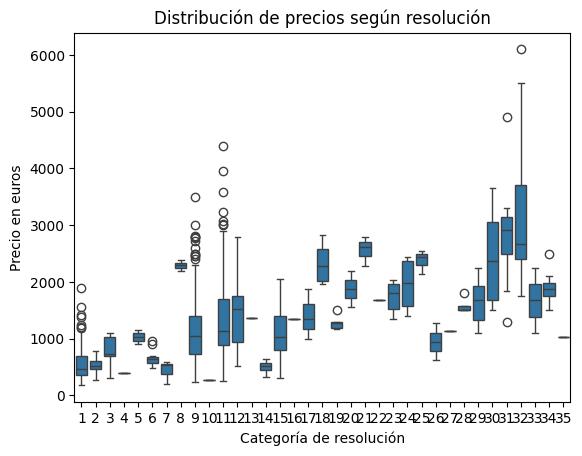

In [60]:
# Gráfico de correlación entre resolución y precio
sns.boxplot(x=df["Resolution_Label"], y=df["Price_euros"])
plt.xlabel("Categoría de resolución")
plt.ylabel("Precio en euros")
plt.title("Distribución de precios según resolución")
plt.show()

Está claro que  no hay una relación lienal en tendencia respecto del precio y la resolución si consideramos la variable que muestra con todas sus características conjuntas. Podrían ser diversas las razones, es por ello que, haremos pruebas con la variable conjunta y las variables que hemos creado.

#### Análisis de correlación entre variables numéricasº

Correlación Pearson: 0.5844, p-valor: 0.0000


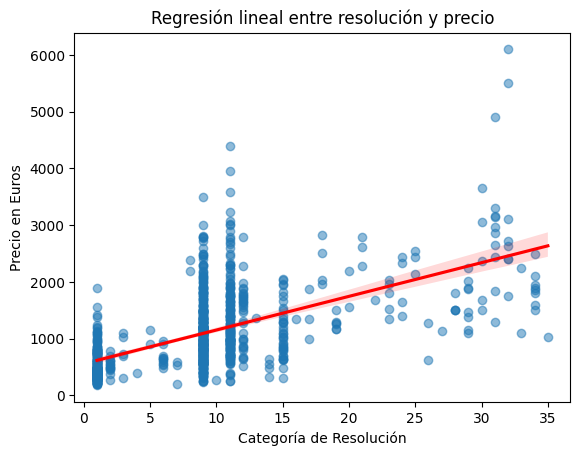

In [61]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Calcular correlación de Pearson
correlation, p_value = stats.pearsonr(df["Resolution_Label"], df["Price_euros"])
print(f"Correlación Pearson: {correlation:.4f}, p-valor: {p_value:.4f}")

# Gráfico de dispersión
sns.regplot(x=df["Resolution_Label"], y=df["Price_euros"], scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
plt.xlabel("Categoría de Resolución")
plt.ylabel("Precio en Euros")
plt.title("Regresión lineal entre resolución y precio")
plt.show()


In [62]:
df["Resolution_Label"].info()  # Rellenar valores NaN con 0

<class 'pandas.core.series.Series'>
RangeIndex: 912 entries, 0 to 911
Series name: Resolution_Label
Non-Null Count  Dtype
--------------  -----
912 non-null    int64
dtypes: int64(1)
memory usage: 7.3 KB


In [63]:
import statsmodels.api as sm

# Variable independiente (Resolution_Label)
X = sm.add_constant(df["Resolution_Label"])  # Agregar constante para el modelo
y = df["Price_euros"]

# Ajuste del modelo de regresión
modelo = sm.OLS(y, X).fit()

# Mostrar resumen del modelo
print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:            Price_euros   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     472.0
Date:                Mon, 23 Jun 2025   Prob (F-statistic):           1.23e-84
Time:                        20:04:36   Log-Likelihood:                -7096.5
No. Observations:                 912   AIC:                         1.420e+04
Df Residuals:                     910   BIC:                         1.421e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              556.3249     31.847  

In [64]:
df_aux = df.copy()

In [65]:
df.columns

Index(['id', 'laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros', 'Weight_kg', 'Ram_GB', 'Memory_GB', 'Resolution_Label',
       'HD', 'Full_HD', 'Quad_HD', 'Ultra_HD_4K', 'IPS_Panel', 'Touchscreen'],
      dtype='object')

In [66]:
df = df[['id','Company', 'Product', 'TypeName', 'Inches',
       'Cpu','Gpu', 'OpSys',
       'Price_euros', 'Weight_kg', 'Ram_GB', 'Memory_GB', 
       'HD', 'Full_HD', 'Quad_HD', 'Ultra_HD_4K', 'IPS_Panel', 'Touchscreen']]

In [67]:
df

,id,Company,Product,TypeName,Inches,Cpu,Gpu,OpSys,Price_euros,Weight_kg,Ram_GB,Memory_GB,HD,Full_HD,Quad_HD,Ultra_HD_4K,IPS_Panel,Touchscreen
0,268,Dell,Inspiron 5567,Notebook,15.6,Intel Core i7 7500U 2.7GHz,AMD Radeon R7 M445,Windows 10,749.00,2.36,8,1000.0,1,0,0,0,0,0
1,347,Asus,X541NA (N4200/4GB/1TB/W10),Notebook,15.6,Intel Pentium Quad Core N4200 1.1GHz,Intel HD Graphics 505,Windows 10,449.00,2.00,4,1000.0,1,0,0,0,0,0
2,353,Toshiba,Portege Z30-C-1CW,Notebook,13.3,Intel Core i5 6200U 2.3GHz,Intel HD Graphics 520,Windows 7,1460.00,1.20,8,256.0,0,1,0,0,0,0
3,578,Dell,Alienware 17,Gaming,15.6,Intel Core i7 7700HQ 2.8GHz,Nvidia GeForce GTX 1070,Windows 10,2868.99,4.42,16,1256.0,0,0,0,1,1,0
4,42,Dell,Latitude E7270,Ultrabook,12.5,Intel Core i5 6300U 2.4GHz,Intel HD Graphics 520,Windows 7,1713.37,1.26,8,256.0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,89,Acer,Chromebook C738T-C2EJ,2 in 1 Convertible,11.6,Intel Celeron Dual Core N3060 1.6GHz,Intel HD Graphics 400,Chrome OS,389.00,1.25,4,32.0,1,0,0,0,1,1
908,716,Toshiba,Portege Z30-C-16H,Notebook,13.3,Intel Core i5 6200U 2.3GHz,Intel HD Graphics 520,Windows 10,1195.00,1.20,4,128.0,0,1,0,0,0,0
909,517,Acer,Aspire ES1-523,Notebook,15.6,AMD A8-Series 7410 2.2GHz,AMD Radeon R5,Windows 10,449.00,2.40,8,1000.0,1,0,0,0,0,0
910,891,Dell,Latitude 7480,Ultrabook,14.0,Intel Core i7 7600U 2.8GHz,Intel HD Graphics 620,Windows 10,1775.00,1.36,8,256.0,0,1,0,0,0,0


In [68]:
def clasificar_segmento(modelo):
    modelo = modelo.lower()
    if any(marca in modelo for marca in ['thinkpad', 'elitebook', 'probook', 'latitude', 'portege', 'tecra', 'lifebook']):
        return "Empresarial"
    elif any(marca in modelo for marca in ['inspiron', 'vivobook', 'zenbook', 'ideapad', 'aspire']):
        return "Consumo general"
    elif any(marca in modelo for marca in ['alienware', 'rog', 'omen', 'predator', 'legion', 'zbook', 'precision', 'msi']):
        return "Alto rendimiento / Gaming"
    elif any(marca in modelo for marca in ['xps', 'yoga', 'spectre', 'swift', 'surface']):
        return "Ultrabook / Convertible"
    elif 'chromebook' in modelo:
        return "Educación / ChromeOS"
    else:
        return "Otro / Indefinido"

# Función para detectar sistema operativo (si aparece mencionado)
def clasificar_sistema(modelo):
    modelo = modelo.lower()
    if 'linux' in modelo:
        return "Linux"
    elif 'chrome' in modelo:
        return "ChromeOS"
    elif "mac" in modelo:
        return "MacOS"
    elif 'android' in modelo:
        return "Android"
    elif any(w in modelo for w in ['w10', 'windows']):
        return "Windows"
    else:
        return "No especificado"
    
def clasificar_procesador(modelo):
    modelo = modelo.lower()
    if 'amd' in modelo:
        return "AMD"
    elif 'intel' in modelo:
        return "Intel"
    else:
        return "Otro_Indefinido"
    
def clasificar_gpu(modelo):
    modelo = modelo.lower()
    if 'amd' in modelo:
        return "AMD_gpu"
    elif 'intel' in modelo:
        return "Intel_gpu"
    else:
        return "Otro_gpu"    



df['Segmento_de_uso'] = df['Product'].apply(clasificar_segmento)
df['OS'] = df['OpSys'].apply(clasificar_sistema)
df['Procesador'] = df['Cpu'].apply(clasificar_procesador)
df['Card_gpu'] = df['Gpu'].apply(clasificar_gpu)


# Mostrar resultados
print(df)



       id  Company                     Product            TypeName  Inches  \
0     268     Dell               Inspiron 5567            Notebook    15.6   
1     347     Asus  X541NA (N4200/4GB/1TB/W10)            Notebook    15.6   
2     353  Toshiba           Portege Z30-C-1CW            Notebook    13.3   
3     578     Dell                Alienware 17              Gaming    15.6   
4      42     Dell              Latitude E7270           Ultrabook    12.5   
..    ...      ...                         ...                 ...     ...   
907    89     Acer       Chromebook C738T-C2EJ  2 in 1 Convertible    11.6   
908   716  Toshiba           Portege Z30-C-16H            Notebook    13.3   
909   517     Acer              Aspire ES1-523            Notebook    15.6   
910   891     Dell               Latitude 7480           Ultrabook    14.0   
911  1179     Dell               Inspiron 3567            Notebook    15.6   

                                      Cpu                      

C:\Users\Abelardo\AppData\Local\Temp\ipykernel_31368\3642039286.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Segmento_de_uso'] = df['Product'].apply(clasificar_segmento)
C:\Users\Abelardo\AppData\Local\Temp\ipykernel_31368\3642039286.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OS'] = df['OpSys'].apply(clasificar_sistema)
C:\Users\Abelardo\AppData\Local\Temp\ipykernel_31368\3642039286.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

In [69]:
df.Segmento_de_uso

0                Consumo general
1              Otro / Indefinido
2                    Empresarial
3      Alto rendimiento / Gaming
4                    Empresarial
                 ...            
907         Educación / ChromeOS
908                  Empresarial
909              Consumo general
910                  Empresarial
911              Consumo general
Name: Segmento_de_uso, Length: 912, dtype: object

In [70]:
df.columns

Index(['id', 'Company', 'Product', 'TypeName', 'Inches', 'Cpu', 'Gpu', 'OpSys',
       'Price_euros', 'Weight_kg', 'Ram_GB', 'Memory_GB', 'HD', 'Full_HD',
       'Quad_HD', 'Ultra_HD_4K', 'IPS_Panel', 'Touchscreen', 'Segmento_de_uso',
       'OS', 'Procesador', 'Card_gpu'],
      dtype='object')

In [71]:
df.info()
df.set_index('id', inplace=True)
print(df.head())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               912 non-null    int64  
 1   Company          912 non-null    object 
 2   Product          912 non-null    object 
 3   TypeName         912 non-null    object 
 4   Inches           912 non-null    float64
 5   Cpu              912 non-null    object 
 6   Gpu              912 non-null    object 
 7   OpSys            912 non-null    object 
 8   Price_euros      912 non-null    float64
 9   Weight_kg        912 non-null    float64
 10  Ram_GB           912 non-null    int64  
 11  Memory_GB        912 non-null    float64
 12  HD               912 non-null    int64  
 13  Full_HD          912 non-null    int64  
 14  Quad_HD          912 non-null    int64  
 15  Ultra_HD_4K      912 non-null    int64  
 16  IPS_Panel        912 non-null    int64  
 17  Touchscreen     

,Company,Product,TypeName,Inches,Cpu,Gpu,OpSys,Price_euros,Weight_kg,Ram_GB,...,HD,Full_HD,Quad_HD,Ultra_HD_4K,IPS_Panel,Touchscreen,Segmento_de_uso,OS,Procesador,Card_gpu
id,,,,,,,,,,,,,,,,,,,,,
268,Dell,Inspiron 5567,Notebook,15.6,Intel Core i7 7500U 2.7GHz,AMD Radeon R7 M445,Windows 10,749.00,2.36,8,...,1,0,0,0,0,0,Consumo general,Windows,Intel,AMD_gpu
347,Asus,X541NA (N4200/4GB/1TB/W10),Notebook,15.6,Intel Pentium Quad Core N4200 1.1GHz,Intel HD Graphics 505,Windows 10,449.00,2.00,4,...,1,0,0,0,0,0,Otro / Indefinido,Windows,Intel,Intel_gpu
353,Toshiba,Portege Z30-C-1CW,Notebook,13.3,Intel Core i5 6200U 2.3GHz,Intel HD Graphics 520,Windows 7,1460.00,1.20,8,...,0,1,0,0,0,0,Empresarial,Windows,Intel,Intel_gpu
578,Dell,Alienware 17,Gaming,15.6,Intel Core i7 7700HQ 2.8GHz,Nvidia GeForce GTX 1070,Windows 10,2868.99,4.42,16,...,0,0,0,1,1,0,Alto rendimiento / Gaming,Windows,Intel,Otro_gpu
42,Dell,Latitude E7270,Ultrabook,12.5,Intel Core i5 6300U 2.4GHz,Intel HD Graphics 520,Windows 7,1713.37,1.26,8,...,0,1,0,0,0,1,Empresarial,Windows,Intel,Intel_gpu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,Acer,Chromebook C738T-C2EJ,2 in 1 Convertible,11.6,Intel Celeron Dual Core N3060 1.6GHz,Intel HD Graphics 400,Chrome OS,389.00,1.25,4,...,1,0,0,0,1,1,Educación / ChromeOS,ChromeOS,Intel,Intel_gpu
716,Toshiba,Portege Z30-C-16H,Notebook,13.3,Intel Core i5 6200U 2.3GHz,Intel HD Graphics 520,Windows 10,1195.00,1.20,4,...,0,1,0,0,0,0,Empresarial,Windows,Intel,Intel_gpu
517,Acer,Aspire ES1-523,Notebook,15.6,AMD A8-Series 7410 2.2GHz,AMD Radeon R5,Windows 10,449.00,2.40,8,...,1,0,0,0,0,0,Consumo general,Windows,AMD,AMD_gpu


In [72]:
pd.get_dummies(df['Segmento_de_uso'], dtype=int)
pd.get_dummies(df['OS'], dtype=int)
pd.get_dummies(df['Company'], dtype=int)
pd.get_dummies(df['TypeName'], dtype=int)
pd.get_dummies(df['Procesador'], dtype=int)
pd.get_dummies(df['Card_gpu'], dtype=int)

dff = pd.get_dummies(df, columns=['Segmento_de_uso', 'OS', 'Company', 'TypeName', 'Procesador', 'Card_gpu'], dtype=int)


In [73]:
dff.columns

Index(['Product', 'Inches', 'Cpu', 'Gpu', 'OpSys', 'Price_euros', 'Weight_kg',
       'Ram_GB', 'Memory_GB', 'HD', 'Full_HD', 'Quad_HD', 'Ultra_HD_4K',
       'IPS_Panel', 'Touchscreen', 'Segmento_de_uso_Alto rendimiento / Gaming',
       'Segmento_de_uso_Consumo general',
       'Segmento_de_uso_Educación / ChromeOS', 'Segmento_de_uso_Empresarial',
       'Segmento_de_uso_Otro / Indefinido',
       'Segmento_de_uso_Ultrabook / Convertible', 'OS_Android', 'OS_ChromeOS',
       'OS_Linux', 'OS_MacOS', 'OS_No especificado', 'OS_Windows',
       'Company_Acer', 'Company_Apple', 'Company_Asus', 'Company_Chuwi',
       'Company_Dell', 'Company_Fujitsu', 'Company_Google', 'Company_HP',
       'Company_Huawei', 'Company_LG', 'Company_Lenovo', 'Company_MSI',
       'Company_Mediacom', 'Company_Microsoft', 'Company_Razer',
       'Company_Samsung', 'Company_Toshiba', 'Company_Vero', 'Company_Xiaomi',
       'TypeName_2 in 1 Convertible', 'TypeName_Gaming', 'TypeName_Netbook',
       'TypeName_N

In [74]:
dff.to_csv("train_transformed.csv", index=False)

In [75]:
dff = dff[['Inches','Price_euros', 'Weight_kg',
       'Ram_GB', 'Memory_GB', 'HD', 'Full_HD', 'Quad_HD', 'Ultra_HD_4K',
       'IPS_Panel', 'Touchscreen', 'Segmento_de_uso_Alto rendimiento / Gaming',
       'Segmento_de_uso_Consumo general',
       'Segmento_de_uso_Educación / ChromeOS', 'Segmento_de_uso_Empresarial',
       'Segmento_de_uso_Otro / Indefinido',
       'Segmento_de_uso_Ultrabook / Convertible', 'OS_Android', 'OS_ChromeOS',
       'OS_Linux', 'OS_MacOS', 'OS_No especificado', 'OS_Windows',
       'Company_Acer', 'Company_Apple', 'Company_Asus', 'Company_Chuwi',
       'Company_Dell', 'Company_Fujitsu', 'Company_Google', 'Company_HP',
       'Company_Huawei', 'Company_LG', 'Company_Lenovo', 'Company_MSI',
       'Company_Mediacom', 'Company_Microsoft', 'Company_Razer',
       'Company_Samsung', 'Company_Toshiba', 'Company_Vero', 'Company_Xiaomi',
       'TypeName_2 in 1 Convertible', 'TypeName_Gaming', 'TypeName_Netbook',
       'TypeName_Notebook', 'TypeName_Ultrabook', 'TypeName_Workstation',
       'Procesador_AMD', 'Procesador_Intel', 'Card_gpu_AMD_gpu',
       'Card_gpu_Intel_gpu', 'Card_gpu_Otro_gpu']]

In [76]:
dff

,Inches,Price_euros,Weight_kg,Ram_GB,Memory_GB,HD,Full_HD,Quad_HD,Ultra_HD_4K,IPS_Panel,...,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,Procesador_AMD,Procesador_Intel,Card_gpu_AMD_gpu,Card_gpu_Intel_gpu,Card_gpu_Otro_gpu
id,,,,,,,,,,,,,,,,,,,,,
268,15.6,749.00,2.36,8,1000.0,1,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
347,15.6,449.00,2.00,4,1000.0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
353,13.3,1460.00,1.20,8,256.0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0
578,15.6,2868.99,4.42,16,1256.0,0,0,0,1,1,...,1,0,0,0,0,0,1,0,0,1
42,12.5,1713.37,1.26,8,256.0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,11.6,389.00,1.25,4,32.0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
716,13.3,1195.00,1.20,4,128.0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0
517,15.6,449.00,2.40,8,1000.0,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0


In [77]:
dff.to_csv("train_transformed.csv", index=False)

In [78]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, 268 to 1179
Data columns (total 53 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Inches                                     912 non-null    float64
 1   Price_euros                                912 non-null    float64
 2   Weight_kg                                  912 non-null    float64
 3   Ram_GB                                     912 non-null    int64  
 4   Memory_GB                                  912 non-null    float64
 5   HD                                         912 non-null    int64  
 6   Full_HD                                    912 non-null    int64  
 7   Quad_HD                                    912 non-null    int64  
 8   Ultra_HD_4K                                912 non-null    int64  
 9   IPS_Panel                                  912 non-null    int64  
 10  Touchscreen                 

In [79]:
X = sm.add_constant(dff[['Weight_kg','Ram_GB',"Full_HD",'Quad_HD','Ultra_HD_4K',
                         'Segmento_de_uso_Consumo general','Segmento_de_uso_Alto rendimiento / Gaming',
                         'Segmento_de_uso_Empresarial',
                         'Segmento_de_uso_Otro / Indefinido',
                         'OS_ChromeOS','OS_MacOS','OS_Linux','OS_No especificado',
                         'Company_Google','Company_Acer', 'Company_Asus','Company_Dell',
                         'Company_LG', 'Company_MSI','Company_Google','Company_HP','Company_Lenovo','Company_Samsung',
                         'Company_Razer', 'Company_Microsoft',
                         'TypeName_2 in 1 Convertible', 
                         'TypeName_Gaming', 
                         'TypeName_Netbook',
                         'TypeName_Notebook', 
                         'TypeName_Ultrabook', 
                         'TypeName_Workstation',
                         'Procesador_AMD']])  # Agregar constante para el modelo
y = df["Price_euros"]

# Ajuste del modelo de regresión
modelo = sm.OLS(y, X).fit()

# Mostrar resumen del modelo
print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:            Price_euros   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     123.3
Date:                Mon, 23 Jun 2025   Prob (F-statistic):          3.63e-291
Time:                        20:04:37   Log-Likelihood:                -6535.4
No. Observations:                 912   AIC:                         1.313e+04
Df Residuals:                     881   BIC:                         1.328e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [80]:
from sklearn import metrics
import numpy as np
from sklearn import metrics
from sklearn.linear_model import LinearRegression


data_test = pd.read_csv("test.csv")
#data_test.set_index('id', inplace=True)

data_test.columns

Index(['id', 'laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight'],
      dtype='object')

In [81]:
# Transformación de Weight (Simplmente eliminamos la unidad kg y convertimos a float)
data_test["Weight_kg"] = data_test["Weight"].str.replace("kg", "").astype(float)

# Transformación de RAM 
data_test["Ram_GB"] = data_test["Ram"].str.replace("GB", "").astype(int)

data_test["Memory_GB"] = data_test["Memory"].apply(convert_memory)

data_test["HD"] = data_test["ScreenResolution"].apply(lambda x: 1 if "1366x768" in x or "1600x900" in x else 0)
data_test["Full_HD"] = data_test["ScreenResolution"].apply(lambda x: 1 if "1920x1080" in x else 0)
data_test["Quad_HD"] = data_test["ScreenResolution"].apply(lambda x: 1 if "2560x1440" in x or "3200x1800" in x else 0)
data_test["Ultra_HD_4K"] = data_test["ScreenResolution"].apply(lambda x: 1 if "3840x2160" in x else 0)
data_test["IPS_Panel"] = data_test["ScreenResolution"].apply(lambda x: 1 if "IPS Panel" in x else 0)
data_test["Touchscreen"] = data_test["ScreenResolution"].apply(lambda x: 1 if "Touchscreen" in x else 0)

data_test['Segmento_de_uso'] = data_test['Product'].apply(clasificar_segmento)
data_test['OS'] = data_test['OpSys'].apply(clasificar_sistema)
data_test['Procesador'] = data_test['Cpu'].apply(clasificar_procesador)
data_test['Card_gpu'] = data_test['Gpu'].apply(clasificar_gpu)

data_testf = pd.get_dummies(data_test, columns=['Segmento_de_uso', 'OS', 'Company', 'TypeName', 'Procesador', 'Card_gpu'], dtype=int)



In [82]:
data_testf.columns

Index(['id', 'laptop_ID', 'Product', 'Inches', 'ScreenResolution', 'Cpu',
       'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Weight_kg', 'Ram_GB',
       'Memory_GB', 'HD', 'Full_HD', 'Quad_HD', 'Ultra_HD_4K', 'IPS_Panel',
       'Touchscreen', 'Segmento_de_uso_Alto rendimiento / Gaming',
       'Segmento_de_uso_Consumo general',
       'Segmento_de_uso_Educación / ChromeOS', 'Segmento_de_uso_Empresarial',
       'Segmento_de_uso_Otro / Indefinido',
       'Segmento_de_uso_Ultrabook / Convertible', 'OS_ChromeOS', 'OS_Linux',
       'OS_MacOS', 'OS_No especificado', 'OS_Windows', 'Company_Acer',
       'Company_Apple', 'Company_Asus', 'Company_Chuwi', 'Company_Dell',
       'Company_Google', 'Company_HP', 'Company_Huawei', 'Company_LG',
       'Company_Lenovo', 'Company_MSI', 'Company_Microsoft', 'Company_Razer',
       'Company_Samsung', 'Company_Toshiba', 'Company_Vero', 'Company_Xiaomi',
       'TypeName_2 in 1 Convertible', 'TypeName_Gaming', 'TypeName_Netbook',
       'TypeName_Not

In [83]:
X_test = data_testf[['Weight_kg','Ram_GB',"Full_HD",'Quad_HD','Ultra_HD_4K',
                         'Segmento_de_uso_Consumo general','Segmento_de_uso_Alto rendimiento / Gaming',
                         'Segmento_de_uso_Empresarial',
                         'Segmento_de_uso_Otro / Indefinido',
                         'OS_ChromeOS','OS_MacOS','OS_Linux','OS_No especificado',
                         'Company_Google','Company_Acer', 'Company_Asus','Company_Dell',
                         'Company_LG', 'Company_MSI','Company_Google','Company_HP','Company_Lenovo','Company_Samsung',
                         'Company_Razer', 'Company_Microsoft',
                         'TypeName_2 in 1 Convertible', 
                         'TypeName_Gaming', 
                         'TypeName_Netbook',
                         'TypeName_Notebook', 
                         'TypeName_Ultrabook', 
                         'TypeName_Workstation',
                         'Procesador_AMD'#
                        #  'Weight_kg','Ram_GB','Quad_HD', 'Ultra_HD_4K',
                        #  'Segmento_de_uso_Consumo general',
                        #  'Segmento_de_uso_Empresarial',
                        #  'Segmento_de_uso_Otro / Indefinido',
                        #  'OS_ChromeOS','OS_MacOS',
                        #  'Company_Google',
                        #  'Company_LG', 'Company_MSI',
                        #  'Company_Razer', 
                        #  'TypeName_2 in 1 Convertible', 
                        #  'TypeName_Gaming', 
                        #  'TypeName_Netbook',
                        #  'TypeName_Notebook', 
                        #  'TypeName_Ultrabook', 
                        #  'TypeName_Workstation',
                        #  'Procesador_AMD','Procesador_Intel'
                        ]]  # Agregar constante para el modelo


In [84]:
X = dff[['Weight_kg','Ram_GB',"Full_HD",'Quad_HD','Ultra_HD_4K',
                         'Segmento_de_uso_Consumo general','Segmento_de_uso_Alto rendimiento / Gaming',
                         'Segmento_de_uso_Empresarial',
                         'Segmento_de_uso_Otro / Indefinido',
                         'OS_ChromeOS','OS_MacOS','OS_Linux','OS_No especificado',
                         'Company_Google','Company_Acer', 'Company_Asus','Company_Dell',
                         'Company_LG', 'Company_MSI','Company_Google','Company_HP','Company_Lenovo','Company_Samsung',
                         'Company_Razer', 'Company_Microsoft',
                         'TypeName_2 in 1 Convertible', 
                         'TypeName_Gaming', 
                         'TypeName_Netbook',
                         'TypeName_Notebook', 
                         'TypeName_Ultrabook', 
                         'TypeName_Workstation',
                         'Procesador_AMD']]
#'Weight_kg','Ram_GB','Quad_HD', 'Ultra_HD_4K',
#                          'Segmento_de_uso_Consumo general',
#                          'Segmento_de_uso_Empresarial',
#                          'Segmento_de_uso_Otro / Indefinido',
#                          'OS_ChromeOS','OS_MacOS',
#                          'Company_Google',
#                          'Company_LG', 'Company_MSI',
#                          'Company_Razer', 
#                          'TypeName_2 in 1 Convertible', 
#                          'TypeName_Gaming', 
#                          'TypeName_Netbook',
#                          'TypeName_Notebook', 
#                          'TypeName_Ultrabook', 
#                          'TypeName_Workstation',
#                          'Procesador_AMD','Procesador_Intel']]  # Agregar constante para el modelo
y = df["Price_euros"]
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X, y)


LinearRegression()

In [85]:
predictions = linear_model.predict(X_test)
predictions

array([2274.30305291,  536.83355475,  320.8174292 , 1176.77505836,
        711.64069521, 1575.98042603, 2679.42484248,  460.32307102,
       5022.5293575 , 1817.44719642, 1227.27446328,  384.087861  ,
        494.08362681,  538.95389256,  416.93756922, 1131.00484863,
        756.85454896, 1503.11751251, 1477.99686257, 1203.41791345,
       1749.27649091, 1468.51229254, 1384.81396763, 1249.61621636,
       1918.77709415,  471.74741829,  786.27706239,  287.56930446,
       1433.29378337,  470.54409175, 1030.30119691, 1213.88792027,
       1767.14899045,  512.24460248,  561.58442527, 1933.6874378 ,
        811.78125249, 1121.78456683, 3140.39409485,  536.83355475,
        451.0214102 ,  743.03706582, 1079.39607574, 1861.08415541,
       1140.68509059,  918.29449818,  476.31392655, 3187.95058861,
        262.04777527, 1417.27072626,  899.33065685, 1336.31573536,
       1285.59680458,  314.53608916, 1018.92746575,  935.52443733,
        944.61106951,  155.02248511, 1205.0809489 , 1326.39671

In [86]:
print('MAE:', metrics.mean_absolute_error(y, linear_model.predict(X)))

pd_join = pd.DataFrame({'id': data_test['id'], 'Price_euros': predictions})
pd_join.to_csv('predictions.csv', index=False)
pd_join.head()

MAE: 217.64564132031146


,id,Price_euros
0,181,2274.303053
1,708,536.833555
2,862,320.817429
3,1064,1176.775058
4,702,711.640695


In [45]:
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np


In [89]:
X.columns
X_test.columns

Index(['Weight_kg', 'Ram_GB', 'Full_HD', 'Quad_HD', 'Ultra_HD_4K',
       'Segmento_de_uso_Consumo general',
       'Segmento_de_uso_Alto rendimiento / Gaming',
       'Segmento_de_uso_Empresarial', 'Segmento_de_uso_Otro / Indefinido',
       'OS_ChromeOS', 'OS_MacOS', 'OS_Linux', 'OS_No especificado',
       'Company_Google', 'Company_Acer', 'Company_Asus', 'Company_Dell',
       'Company_LG', 'Company_MSI', 'Company_Google', 'Company_HP',
       'Company_Lenovo', 'Company_Samsung', 'Company_Razer',
       'Company_Microsoft', 'TypeName_2 in 1 Convertible', 'TypeName_Gaming',
       'TypeName_Netbook', 'TypeName_Notebook', 'TypeName_Ultrabook',
       'TypeName_Workstation', 'Procesador_AMD'],
      dtype='object')

In [94]:
poly_feats = PolynomialFeatures(degree = 2)
poly_feats.fit(X)
X_poly = poly_feats.transform(X)

linear_model.fit(X_poly, y)



LinearRegression()

In [95]:
poly_feats.fit(X_test)
X_poly_test = poly_feats.transform(X_test)
Polypredictions = linear_model.predict(X_poly_test)

In [96]:
print('MAE:', metrics.mean_absolute_error(y, linear_model.predict(X_poly)))

Polypd_join = pd.DataFrame({'id': data_test['id'], 'Price_euros': Polypredictions})
Polypd_join.to_csv('Polypredictions.csv', index=False)
Polypd_join.head()

MAE: 149.59988810641588


,id,Price_euros
0,181,2287.331311
1,708,480.883177
2,862,396.763405
3,1064,1153.786361
4,702,727.614086


In [102]:
corr = df.corr(numeric_only=True)
corr

,Inches,Price_euros,Weight_kg,Ram_GB,Memory_GB,HD,Full_HD,Quad_HD,Ultra_HD_4K,IPS_Panel,Touchscreen
Inches,1.000000,0.077798,0.830464,0.245243,0.514907,-0.008889,0.154060,-0.171537,0.041070,-0.099530,-0.370802
Price_euros,0.077798,1.000000,0.231864,0.747748,0.177451,-0.470571,0.182336,0.187397,0.399715,0.270170,0.176573
Weight_kg,0.830464,0.231864,1.000000,0.416750,0.551652,-0.037792,0.135743,-0.161641,0.096534,0.015827,-0.275896
Ram_GB,0.245243,0.747748,0.416750,1.000000,0.381714,-0.401318,0.191150,0.120629,0.332801,0.210111,0.125682
Memory_GB,0.514907,0.177451,0.551652,0.381714,1.000000,-0.050668,0.072521,-0.058329,0.098560,-0.004383,-0.129168
HD,-0.008889,-0.470571,-0.037792,-0.401318,-0.050668,1.000000,-0.793644,-0.108303,-0.117602,-0.343237,-0.135485
Full_HD,0.154060,0.182336,0.135743,0.191150,0.072521,-0.793644,1.000000,-0.240671,-0.261334,0.175676,-0.099985
Quad_HD,-0.171537,0.187397,-0.161641,0.120629,-0.058329,-0.108303,-0.240671,1.000000,-0.035662,0.066024,0.277812
Ultra_HD_4K,0.041070,0.399715,0.096534,0.332801,0.098560,-0.117602,-0.261334,-0.035662,1.000000,0.132771,0.228944
IPS_Panel,-0.099530,0.270170,0.015827,0.210111,-0.004383,-0.343237,0.175676,0.066024,0.132771,1.000000,0.150725


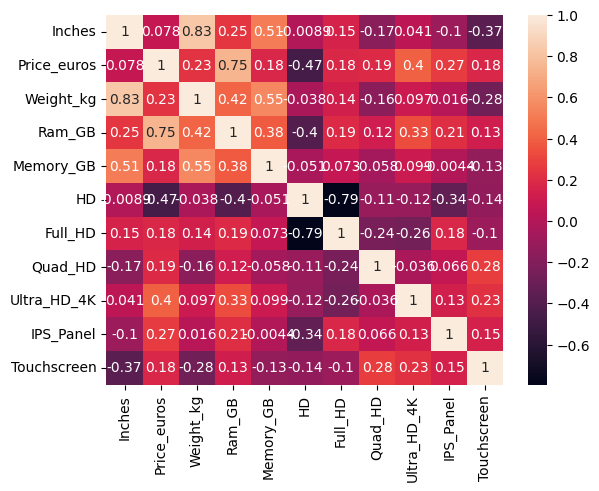

In [103]:
sns.heatmap(corr, annot=True);

In [104]:
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge,Lasso,ElasticNet,RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score,root_mean_squared_error

In [105]:
# Incicio de variables 

RIDGE_alphas = np.logspace(-3, 3, 100)
LASSO_alphas = np.logspace(-3, 3, 100)
ELN_alphas = np.logspace(-3, 3, 100)


# Ajustes
models = {
    "Ridge" : RidgeCV(alphas=RIDGE_alphas, cv=5),
    "Lasso" : LassoCV(alphas=LASSO_alphas, cv=5, max_iter=1000),
    "ElasticNet" : ElasticNetCV(alphas=ELN_alphas, l1_ratio=1,cv=5, max_iter=1000),
}


results_test = []
results_train = []

for name, model in models.items():
    model.fit(X, y)
    y_pred_train = model.predict(X)


    mae_train = metrics.mean_absolute_error(y, model.predict(X))
    results_train.append({"Modelo": name, 
                    "MAE": mae_train})
    
    y_pred = model.predict(X_test)
    

  

results_train_df = pd.DataFrame(results_train).sort_values("MAE").reset_index(drop=True)

print("── PERFORMANCE CON VARIABLES ESTANDARIZADAS EN ENTRENAMIENTO ──")
print(results_train_df, "\n")



# Coeficientes
best_name = results_train_df.loc[0, "Modelo"]
best_model = models[best_name]
coef_stand = pd.Series(best_model.coef_, index=X.columns)
intercept = best_model.intercept_

print(f"Mejor modelo: {best_name}\n")
print("── COEFICIENTES (VARIABLES ESTANDARIZADAS) ──")
print(coef_stand)
print(f"Intercepto: {intercept:.2f}\n")

── PERFORMANCE CON VARIABLES ESTANDARIZADAS EN ENTRENAMIENTO ──
       Modelo         MAE
0       Lasso  218.293501
1  ElasticNet  218.293501
2       Ridge  220.503047 

Mejor modelo: Lasso

── COEFICIENTES (VARIABLES ESTANDARIZADAS) ──
Weight_kg                                     136.740226
Ram_GB                                         64.414411
Full_HD                                       143.971985
Quad_HD                                       450.284959
Ultra_HD_4K                                   682.281802
Segmento_de_uso_Consumo general              -204.743955
Segmento_de_uso_Alto rendimiento / Gaming     145.368926
Segmento_de_uso_Empresarial                   305.173088
Segmento_de_uso_Otro / Indefinido            -127.866116
OS_ChromeOS                                  -221.948642
OS_MacOS                                      456.885994
OS_Linux                                      -80.901423
OS_No especificado                           -119.812434
Company_Google        

In [ ]:
from sklearn import preprocessing

test_size = 0.20
random_seed = 42
RIDGE_alphas = np.logspace(-3, 3, 100)
LASSO_alphas = np.logspace(-3, 3, 100)
ELN_alphas = np.logspace(-3, 3, 100)


# Estandarización
std_scale= preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std  = std_scale.transform(X_test)


# Ajustes
models = {
    "linear_model": LinearRegression(),
    "Ridge" : RidgeCV(alphas=RIDGE_alphas, cv=5),
    "Lasso" : LassoCV(alphas=LASSO_alphas, cv=5, max_iter=1000),
    "ElasticNet" : ElasticNetCV(alphas=ELN_alphas, l1_ratio=1,cv=5, max_iter=1000),
}


results_test = []
results_train = []


for name, model in models.items():
    model.fit(X_train_std, y_train)
    y_pred_train = model.predict(X_train_std)
    mse_train = mean_squared_error(y_train, y_pred_train)
    rmse_train = np.sqrt(mse_train) # root mean_squared_error(y_test, y_pred)
    r2_train   = r2_score(y_train, y_pred_train)
    results_train.append({"Modelo": name, 
                    "MSE": mse_train,
                    "RMSE": rmse_train, 
                    "R²": r2_train})
    

    model.fit(X_train_std, y_train)
    y_pred = model.predict(X_test_std)
    mse_test = mean_squared_error(y_test, y_pred)
    rmse_test = np.sqrt(mse_test) # root mean_squared_error(y_test, y_pred)
    r2_test   = r2_score(y_test, y_pred)
    results_test.append({"Modelo": name, 
                    "MSE": mse_test,
                    "RMSE": rmse_test, 
                    "R²": r2_test})




perf_df = (pd.DataFrame(results_train)
           .sort_values("RMSE")
           .reset_index(drop=True))
print("\n── PERFORMANCE (variables estandarizadas-ENTRENAMIENTO) ──")
print(perf_df.to_string(index=False))


perf_df = (pd.DataFrame(results_test)
           .sort_values("RMSE")
           .reset_index(drop=True))
print("\n── PERFORMANCE (variables estandarizadas) ──")
print(perf_df.to_string(index=False))


In [ ]:
# Seleccionamos el mejor
best_name  = perf_df.loc[0, "Modelo"]
best_model = models[best_name]
beta_std   = pd.Series(best_model.coef_, index=X.columns)
b0_std     = best_model.intercept_

print(f"\n► Mejor modelo: {best_name}")
print("Coeficientes (β_std):")
print(beta_std.round(3))
print(f"Intercepto (β₀_std): {b0_std:.3f}\n")

